In [21]:
import pandas as pd
from base64 import b64decode
from io import BytesIO
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../../post2ctr_dataset.csv")

In [7]:
df.head(2)

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


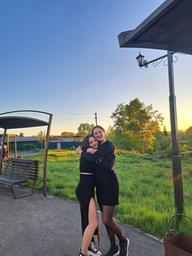

In [62]:
img = Image.open(BytesIO(b64decode(df.loc[1, "photo"])))
img

In [63]:
df.loc[1, "text"]

'• &#128571;'

In [50]:
unique_shapes = set()

def insert(cell):
    img = Image.open(BytesIO(b64decode(cell["photo"])))
    unique_shapes.add(img.size)

df.apply(insert, axis=1)
print(min(unique_shapes), max(unique_shapes))

(64, 256) (256, 256)


<Axes: >

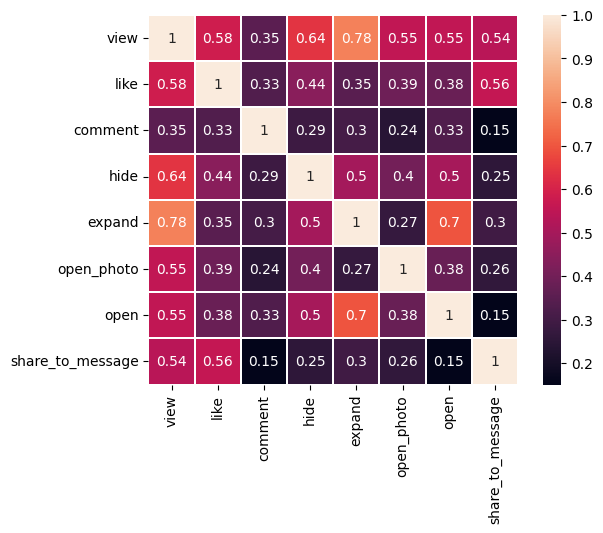

In [35]:
NumericData = df[["view","like","comment","hide","expand","open_photo","open","share_to_message"]]

sns.heatmap(
    NumericData.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    linecolor="white",
    annot=True,
)

<Axes: >

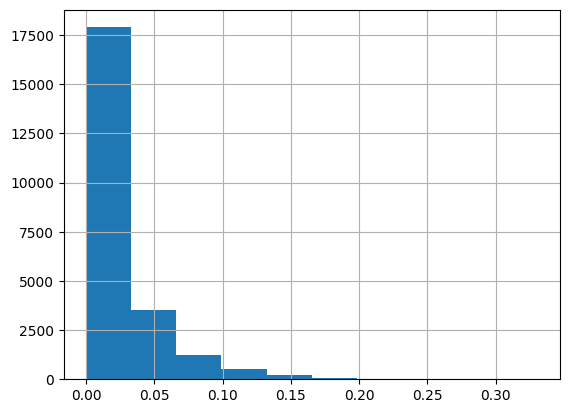

In [53]:
(df["like"] / df["view"]).hist()

<Axes: >

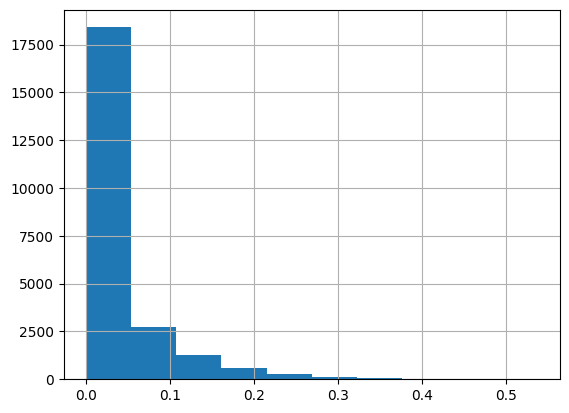

In [54]:
(df["open_photo"] / df["view"]).hist()

aboba
aboba
aboba


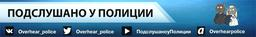

In [61]:
image = 1
for row in df.itertuples():
    img = Image.open(BytesIO(b64decode(row[10])))
    if img.size[1] < 40:
        print("aboba")
        image = img
image